In [1]:
from itertools import permutations
import time
import sys
import matplotlib.pyplot as plt

Shortest Route: [0, 1, 4, 3, 2]
Total Distance: 80


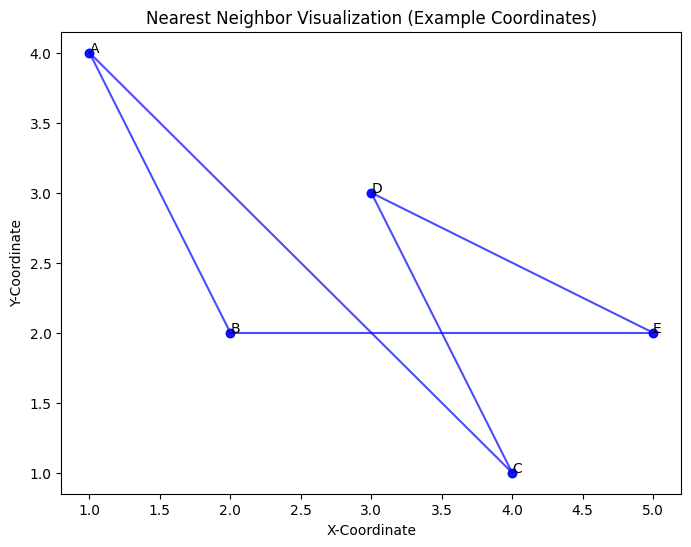

The memory usage for the distance matrix is: 0.094 KB.


In [3]:
#import matplotlib.pyplot as plt

# Distance matrix representing distances between cities
distance_matrix = [
    [0, 10, 15, 20, 25],
    [10, 0, 35, 25, 15],
    [15, 35, 0, 30, 40],
    [20, 25, 30, 0, 10],
    [25, 15, 40, 10, 0]
]

# Function to calculate the total distance of a route
def calculate_total_distance(route):
    total_distance = 0
    for i in range(len(route) - 1):
        city1 = route[i]
        city2 = route[i + 1]
        total_distance += distance_matrix[city1][city2]
    total_distance += distance_matrix[route[-1]][route[0]]  # Add distance back to starting city
    return total_distance

# Nearest Neighbor Heuristic
def nearest_neighbor(start_city):
    visited_cities = [start_city]
    remaining_cities = list(range(len(distance_matrix)))
    remaining_cities.remove(start_city)

    while remaining_cities:
        current_city = visited_cities[-1]
        nearest_city_index = None
        min_distance = float('inf')

        for i in remaining_cities:
            distance = distance_matrix[current_city][i]
            if distance < min_distance:
                min_distance = distance
                nearest_city_index = i

        visited_cities.append(nearest_city_index)
        remaining_cities.remove(nearest_city_index)

    return visited_cities

# Find the shortest route using Nearest Neighbor
start_city = 0  # You can choose any starting city
route = nearest_neighbor(start_city)
total_distance = calculate_total_distance(route)

# Print results
print("Shortest Route:", route)
print("Total Distance:", total_distance)

# Visualization (using Matplotlib)
city_names = ["A", "B", "C", "D", "E"]  # Assign names to cities (optional)
x_coords = [1, 2, 4, 3, 5]  # Example coordinates (replace with actual coordinates if available)
y_coords = [4, 2, 1, 3, 2]  # Example coordinates (replace with actual coordinates if available)

plt.figure(figsize=(8, 6))
for i in range(len(route)):
    city1 = route[i]
    city2 = route[(i + 1) % len(route)]  # Connect last city to first for cyclic path
    plt.plot([x_coords[city1], x_coords[city2]], [y_coords[city1], y_coords[city2]], 'b-o', alpha=0.7)

for i, name in enumerate(city_names):
    plt.annotate(name, (x_coords[i], y_coords[i]))

plt.title("Nearest Neighbor Visualization (Example Coordinates)")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.show()
# Calculate and print the memory usage of the distances dictionary
# sys.getsizeof returns the size in bytes; we convert it to kilobytes
memory_usage_kb = sys.getsizeof(distance_matrix) / 1024

print(f"The memory usage for the distance matrix is: {memory_usage_kb:.3f} KB.")

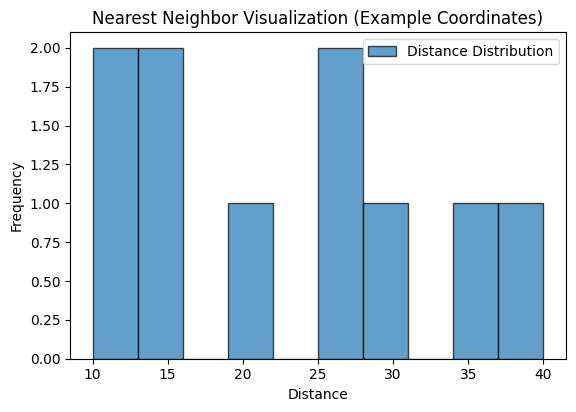

In [4]:
# Histogram of distances
distances = [distance_matrix[i][j] for i in range(len(distance_matrix)) for j in range(len(distance_matrix)) if i < j]
plt.hist(distances, bins=10, edgecolor='black', alpha=0.7, label='Distance Distribution')
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Nearest Neighbor Visualization (Example Coordinates)")
plt.legend()

plt.subplots_adjust(bottom=0.2)  # Adjust layout to accommodate both plots
plt.show()

The histogram we see in the visualization represents the distribution of distances between the cities in our traveling salesman problem. Here's a breakdown of how to interpret it:

X-axis (Horizontal axis):

This axis represents the distance between pairs of cities. It's typically scaled to show the range of distances present in our data.
Y-axis (Vertical axis):

This axis represents the frequency or count. It shows how many pairs of cities fall within each distance range (called bins).
Bars:

Each bar in the histogram corresponds to a specific distance range (bin).
The height of a bar indicates the number of city pairs that have a distance within that range.
Interpreting the Histogram:

Spreading of Bars:
If the bars are spread out relatively evenly across the distance range, it suggests a more uniform distribution of distances between cities.
If most bars are concentrated in a particular region, it indicates that most city pairs have distances within that range.
Identifying Potential Challenges:
Large distances between some city pairs (reflected by bars at the far ends of the histogram) might pose challenges for the traveling salesman and could potentially increase the total route distance.